In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

bankr_df = pd.read_csv(r'C:\Users\bigDLosDaddySchlong\Documents\Spring2021\DataScience\bankruptcyDS\data.csv')
bankr_df = bankr_df.rename(columns={"Bankrupt?": "Bankrupt"})
bankr_df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
X = bankr_df.drop('Bankrupt', axis=1)
y = bankr_df['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5114, 95)
(1705, 95)
(5114,)
(1705,)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

rand_forest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)
knn = KNeighborsClassifier(n_neighbors=5)
dec_tree = DecisionTreeClassifier(random_state=2)

rand_forest.fit(X_train, y_train)
knn.fit(X_train,y_train)
dec_tree.fit(X_train, y_train)

rand_forest_predict = rand_forest.predict(X_test)
knn_predict = knn.predict(X_test)
dec_tree_predict = dec_tree.predict(X_test)

rand_forest_score = accuracy_score(y_test, rand_forest_predict)
knn_score = accuracy_score(y_test, knn_predict)
dec_tree_score = accuracy_score(y_test, dec_tree_predict)

print('Random Forest accuracy: ' + str(rand_forest_score))
print('KNN accuracy: ' + str(knn_score))
print('Decision Tree accuracy: ' + str(dec_tree_score))

Random Forest accuracy: 0.9718475073313783
KNN accuracy: 0.9683284457478006
Decision Tree accuracy: 0.9536656891495601


In [4]:
# So far we have trained 3 models: Random Forest, KNN, & Decision Tree classifiers and got high accuracy scores for all.
# With such high accuracy scores, we suspected our data to be unbalanced and it was. Only about 3% of our data samples
# actually went bankrupt. 

In [5]:
num_1 = (bankr_df.Bankrupt == 1).sum()
num_0 = (bankr_df.Bankrupt == 0).sum()
print(num_1/(num_1 + num_0))
print(num_1)
print(num_0)

0.03226279513125092
220
6599


In [6]:
from sklearn import metrics

y_predict_proba = dec_tree.predict_proba(X_test)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_predict_proba[:,1], pos_label=1)
AUC1 = metrics.auc(fpr1, tpr1)
print('Area Under the Curve: ' + str(AUC1))

Area Under the Curve: 0.7142900302114803


In [7]:
y_predict_proba = rand_forest.predict_proba(X_test)
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_test, y_predict_proba[:,1], pos_label=1)
AUC5 = metrics.auc(fpr5, tpr5)
print('Area Under the Curve: ' + str(AUC5))

Area Under the Curve: 0.8591117824773413


In [8]:
print(X.columns)

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [9]:
from sklearn.utils import resample
import statistics

predictions = []

for i in range(29):
    bootstrap_size = int(.8 * 5114) ### 5114 rows in our 'training' dataset
    bootstrapDataSetX_train = resample(X_train, n_samples = bootstrap_size , random_state=i , replace = True)
    bootstrapDataSetY_train = resample(y_train, n_samples = bootstrap_size , random_state=i , replace = True)

    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(bootstrapDataSetX_train, bootstrapDataSetY_train)
    y_predict = Base_DecisionTree.predict(X_test)

    predictions.append(y_predict)
    


In [10]:
# Here we are printing our predictions matrix. 
# 28 rows consisting of 1705 predictions.
# The columns in the matrix are the votes on a feature from each iteration. 
# We take the majority vote on each column and create a final array of votes.

for x in range(len(predictions)):
    for y in range(len(predictions[x])):
        print(predictions[x][y], end=' ')
    print(str(x) + '#\n')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 

0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 

0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 

In [11]:
# a is our Transposed Predictions Matrix

a = np.array(predictions)
print(a.T)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
# After transposing we have 1705 rows of predictions to be voted on. 

for x in range(len(a.T)):
    for y in range(len(a.T[x])):
        print(a.T[x][y], end=' ')
    print('  ' + str(x) + '\n')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0   2

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3

0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0   4

0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0   5

0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0   6

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   7

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   8

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   9

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   10

0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0   11

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   12

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   13

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   14

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   133

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   134

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   135

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   136

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   137

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   138

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   139

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   140

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   141

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   142

0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0   143

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   144

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   145

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   146

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   147

0 0 0 0 0 0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   288

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   289

0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   290

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   291

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   292

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   293

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   294

0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0   295

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   296

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   297

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   298

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   299

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   300

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   301

0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0   302

0 0 0 0 0 0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   428

0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0   429

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   430

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   431

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   432

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   433

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   434

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   435

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   436

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   437

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   438

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   439

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   440

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0   441

0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   442

0 0 0 0 0 0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   583

0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1   584

0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   585

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   586

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   587

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   588

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   589

0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1   590

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   591

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   592

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   593

0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   594

0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   595

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   596

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0   597

0 0 0 0 0 0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   721

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   722

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   723

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   724

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1   725

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   726

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   727

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   728

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0   729

1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   730

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   731

0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0   732

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   733

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   734

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   735

0 0 0 0 0 0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0   876

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   877

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   878

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   879

0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   880

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   881

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   882

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   883

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   884

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0   885

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   886

1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0   887

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   888

0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1   889

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   890

0 0 0 0 0 0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1014

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1015

0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1016

0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0   1017

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1018

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1019

0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1020

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1021

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1022

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1023

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1024

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1025

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1026

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1027

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1028

0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1139

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1140

0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1141

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1142

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1143

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1144

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1145

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1146

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1147

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1148

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1149

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0   1150

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1151

0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0   1152

1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0   1153

0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1300

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1301

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1302

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1303

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1304

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1305

0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1306

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1307

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1308

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1309

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0   1310

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1311

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1312

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1313

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1314

0 0 0 0 0 

0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0   1449

1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1450

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1451

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1452

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1453

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1454

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1455

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1456

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1457

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1458

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1459

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1460

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1461

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1462

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1463

1 1 1 1 1 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0   1585

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1586

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1587

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1588

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1589

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1590

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0   1591

0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1   1592

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1593

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0   1594

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0   1595

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1596

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1597

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1598

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0   1599

0 0 0 0 0 

In [13]:
final_arr = []
for x in range(len(a.T)):
    final_arr.append(statistics.mode(a.T[x]))

decTreeScore = accuracy_score(y_test, final_arr)
print("Accuracy using bagging with 29 base decision tree classifiers: " + str(decTreeScore))

Accuracy using bagging with 29 base decision tree classifiers: 0.9706744868035191


In [14]:
# Here we use the same bagging technique, but now we are trying to find the probability. 

predictions = []
for i in range(29):
    bootstrap_size = int(.8 * 5114) ### 150 rows in our 'training' dataset
    bootstrapDataSetX_train = resample(X_train, n_samples = bootstrap_size , random_state=i , replace = True)
    bootstrapDataSetY_train = resample(y_train, n_samples = bootstrap_size , random_state=i , replace = True)

    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(bootstrapDataSetX_train, bootstrapDataSetY_train)
    y_predict_proba = Base_DecisionTree.predict_proba(X_test)

    predictions.append(y_predict_proba[:,1])

a = np.array(predictions)

In [15]:
final_arr = []
count = 0

# Sum the votes in each row, divide by # of columns, then append to final_arr

for x in range(len(a.T)):
    for y in range(len(a.T[x])):
        if(a.T[x][y] == 1):
            count += 1
    final_arr.append((count/29))
    count = 0
print(final_arr)

[0.0, 0.0, 0.06896551724137931, 0.0, 0.034482758620689655, 0.10344827586206896, 0.06896551724137931, 0.0, 0.0, 0.0, 0.0, 0.1724137931034483, 0.0, 0.0, 0.0, 0.034482758620689655, 0.0, 0.0, 0.034482758620689655, 0.0, 0.06896551724137931, 0.0, 0.0, 0.4482758620689655, 0.034482758620689655, 0.0, 0.0, 0.13793103448275862, 0.10344827586206896, 0.27586206896551724, 0.1724137931034483, 0.0, 0.0, 0.034482758620689655, 0.034482758620689655, 0.10344827586206896, 0.0, 0.0, 0.0, 0.034482758620689655, 0.0, 0.0, 0.034482758620689655, 0.0, 0.06896551724137931, 0.0, 0.0, 0.10344827586206896, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06896551724137931, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3103448275862069, 0.034482758620689655, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034482758620689655, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2413793103448276, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10344827586206896, 0.0, 0.0, 0.06896551724137931, 0.0, 0.103448275

In [16]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, final_arr, pos_label=1)
AUC2 = metrics.auc(fpr2, tpr2)
print('\n\nBagging AUC: ' + str(AUC2))



Bagging AUC: 0.8665256797583081


In [17]:
results = pd.DataFrame()
results['actual'] = y_test
results['proba'] = final_arr
results[::40]

,actual,proba
3327,0,0.000000
2887,0,0.000000
4888,0,0.000000
866,0,0.000000
4557,0,0.000000
4150,0,0.000000
4824,0,0.000000
621,0,0.000000
1493,0,0.000000
369,0,0.000000


In [18]:
# Here we use AdaBoost & XGBoost.
# Then plot all AUCs generated thus far. 

In [19]:
from sklearn.ensemble import AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train, y_train)
y_predict = my_AdaBoost.predict(X_test)
ada_boost_score = accuracy_score(y_test, y_predict)
print("AdaBoost Accuracy: " + str(ada_boost_score))

y_predict_proba = my_AdaBoost.predict_proba(X_test)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_predict_proba[:,1], pos_label=1)
AUC3 = metrics.auc(fpr3, tpr3)
print("AdaBoost AUC: " + str(AUC3))

AdaBoost Accuracy: 0.9618768328445748
AdaBoost AUC: 0.9156858006042295


In [20]:
from xgboost import XGBClassifier

my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2,use_label_encoder=False)

my_XGBoost.fit(X_train, y_train) 
y_predict = my_XGBoost.predict(X_test)
xgb_score = accuracy_score(y_test, y_predict)
print("XGB Accuracy: " + str(xgb_score))

y_predict_proba = my_XGBoost.predict_proba(X_test)
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, y_predict_proba[:,1], pos_label=1)
AUC4 = metrics.auc(fpr4, tpr4)
print("XGBoost AUC: " + str(AUC4))

[11:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Accuracy: 0.9712609970674487
XGBoost AUC: 0.9326042296072506


In [21]:
svm = SVC(C=100, probability=True)
# Training ONLY on the training set:
svm.fit(X_train, y_train)

# Testing on the testing set:
y_predict_svm = svm.predict(X_test)

#find accuracy of svm
score_svm = accuracy_score(y_test, y_predict_svm)
print("Accuracy for SVM: %.2f%%" % (score_svm * 100.0))

NameError: name 'SVC' is not defined

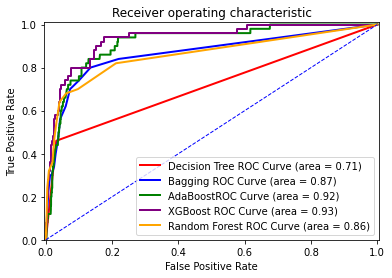

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr1, tpr1, color='red', lw=2, label='Decision Tree ROC Curve (area = %0.2f)' % AUC1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Bagging ROC Curve (area = %0.2f)' % AUC2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='AdaBoostROC Curve (area = %0.2f)' % AUC3)
plt.plot(fpr4, tpr4, color='purple', lw=2, label='XGBoost ROC Curve (area = %0.2f)' % AUC4)
plt.plot(fpr5, tpr5, color='orange', lw=2, label='Random Forest ROC Curve (area = %0.2f)' % AUC5)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [23]:
# Here we are using PCA, SVM, & gridsearch to find the best parameter 'c' for svm

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

X = bankr_df.drop('Bankrupt', axis=1)
y = bankr_df['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=2)

k = 25

my_pca = PCA(n_components=k)

X_PCA = my_pca.fit_transform(X)

print(X_PCA.shape)

c_numbers = [0.1, 1, 10, 100, 1000, 5000, 10000, 50000, 100000]
parameters = {'C':c_numbers}

my_svm = SVC(kernel='rbf', gamma=0.0005, random_state=1)

grid = GridSearchCV(my_svm, parameters, cv=10, scoring='roc_auc')
grid.fit(X_PCA, y)

print(grid.best_score_)
print(grid.best_params_)

(6819, 25)


NameError: name 'SVC' is not defined

In [6]:
# Here we are using Recursive Feature Elimination as our Feature Extraction technique
# We have nearly 100 data samples and 20% of that felt like a good number. 

from sklearn.feature_selection import RFE

rand_forest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)
selected_features = RFE((rand_forest), n_features_to_select=46)

selected_features.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=19, random_state=3),
    n_features_to_select=46)

In [7]:
# We see which features made the cut with RFE method 'get_support()'
mask = selected_features.get_support()
mask

array([ True,  True, False, False, False, False, False, False,  True,
        True,  True, False, False,  True, False,  True, False,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True, False, False,
        True,  True, False,  True, False,  True, False,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True])

In [8]:
# We see the ranking of each feature
selected_features.ranking_

array([ 1,  1,  7, 14, 42, 39, 23, 16,  1,  1,  1, 37, 22,  1, 47,  1, 17,
        1,  1,  1, 46,  9,  1, 33, 45, 48, 34,  3, 18,  1,  1,  1, 31,  1,
        1,  1,  1,  1, 40,  1, 44, 29,  1, 20, 28,  1,  1,  5,  1, 27,  1,
       32,  1,  2,  6, 15,  1,  1,  1, 10, 43,  1, 30,  1,  1,  8, 21,  4,
        1, 35,  1, 11,  1, 25, 19, 38, 24, 41,  1, 12,  1, 36, 26,  1, 50,
        1,  1,  1,  1,  1, 13,  1,  1, 49,  1])

In [9]:
# We create a DF to show whether a feature was selected or not.

features = pd.DataFrame({'features': list(bankr_df.drop('Bankrupt', axis=1)), 'selected': list(mask)})
true_features = features.loc[features['selected'] == True]
features_list = list(true_features['features'])

print(features[::2])
print('\n')
print(features_list)

                                             features  selected
0    ROA(C) before interest and depreciation befor...      True
2    ROA(B) before interest and depreciation after...     False
4                         Realized Sales Gross Margin     False
6                           Pre-tax net Interest Rate     False
8         Non-industry income and expenditure/revenue      True
10                             Operating Expense Rate      True
12                                     Cash flow rate     False
14                                       Tax rate (A)     False
16                            Net Value Per Share (A)     False
18            Persistent EPS in the Last Four Seasons      True
20                         Revenue Per Share (Yuan ¥)     False
22           Per Share Net profit before tax (Yuan ¥)      True
24                       Operating Profit Growth Rate     False
26                     Regular Net Profit Growth Rate     False
28                            Total Asse

In [10]:
RFE_bankr_df = bankr_df[features_list]
RFE_bankr_df['Bankrupt'] = bankr_df['Bankrupt']
RFE_bankr_df

<ipython-input-10-38a5e331028c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFE_bankr_df['Bankrupt'] = bankr_df['Bankrupt']


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Interest-bearing debt interest rate,Net Value Per Share (B),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.302646,0.780985,1.256969e-04,7.250725e-04,0.147950,0.147950,0.169141,0.311664,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.303556,0.781506,2.897851e-04,6.470647e-04,0.182251,0.182251,0.208944,0.318137,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.302035,0.780284,2.361297e-04,7.900790e-04,0.177911,0.193713,0.180581,0.307102,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.303350,0.781241,1.078888e-04,4.490449e-04,0.154187,0.154187,0.193722,0.321674,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.303475,0.781550,7.890000e+09,6.860686e-04,0.167502,0.167502,0.212537,0.319162,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.024752,0.575617,0.035490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.303510,0.781588,1.510213e-04,1.790179e-04,0.175045,0.175045,0.216602,0.320966,...,0.027951,0.799927,0.000466,0.623620,0.604455,0.840359,0.027064,0.566193,0.029890,0
6815,0.475162,0.538269,0.303520,0.781586,5.220000e+09,2.370237e-04,0.181324,0.181324,0.216697,0.318278,...,0.031470,0.799748,0.001959,0.623931,0.598306,0.840306,0.027009,0.566018,0.038284,0
6816,0.472725,0.533744,0.303512,0.781546,2.509312e-04,0.000000e+00,0.269521,0.269521,0.210929,0.324857,...,0.007542,0.797778,0.002840,0.624156,0.610441,0.840138,0.026791,0.565158,0.097649,0
6817,0.506264,0.559911,0.303498,0.781663,1.236154e-04,2.110211e-04,0.213392,0.213392,0.228326,0.346573,...,0.022916,0.811808,0.002837,0.623957,0.607846,0.841084,0.026822,0.565302,0.044009,0


In [11]:
# Using our new matrix with top 20 features we will compare AUC of the models we ran before feature extraction

X = RFE_bankr_df.drop('Bankrupt', axis=1)
y = RFE_bankr_df['Bankrupt']
X_train_RFE, X_test_RFE, y_train_RFE, y_test_RFE = train_test_split(X, y, test_size=.25, random_state=2)

print(X_train_RFE.shape)
print(X_test_RFE.shape)
print(y_train_RFE.shape)
print(y_test_RFE.shape)

(5114, 46)
(1705, 46)
(5114,)
(1705,)


In [12]:
from sklearn import metrics

dec_tree.fit(X_train_RFE, y_train_RFE)

y_predict_proba = dec_tree.predict_proba(X_test_RFE)
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_test_RFE, y_predict_proba[:,1], pos_label=1)
AUC6 = metrics.auc(fpr6, tpr6)
print('Area Under the Curve: ' + str(AUC6))

Area Under the Curve: 0.686404833836858


In [13]:
rand_forest.fit(X_train_RFE, y_train_RFE)

y_predict_proba = rand_forest.predict_proba(X_test_RFE)
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_test_RFE, y_predict_proba[:,1], pos_label=1)
AUC7 = metrics.auc(fpr7, tpr7)
print('Area Under the Curve: ' + str(AUC7))

Area Under the Curve: 0.888858006042296


In [14]:
predictions = []
for i in range(29):
    bootstrap_size = int(.8 * 5114) ### 150 rows in our 'training' dataset
    bootstrapDataSetX_train = resample(X_train_RFE, n_samples = bootstrap_size , random_state=i , replace = True)
    bootstrapDataSetY_train = resample(y_train_RFE, n_samples = bootstrap_size , random_state=i , replace = True)

    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(bootstrapDataSetX_train, bootstrapDataSetY_train)
    y_predict_proba = Base_DecisionTree.predict_proba(X_test_RFE)

    predictions.append(y_predict_proba[:,1])

a = np.array(predictions)

final_arr = []
count = 0

# Sum the votes in each row, divide by # of columns, then append to final_arr

for x in range(len(a.T)):
    for y in range(len(a.T[x])):
        if(a.T[x][y] == 1):
            count += 1
    final_arr.append((count/29))
    count = 0
    
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_test_RFE, final_arr, pos_label=1)
AUC8 = metrics.auc(fpr8, tpr8)
print('Bagging AUC: ' + str(AUC8))

NameError: name 'resample' is not defined

In [15]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train_RFE, y_train_RFE)

y_predict_proba = my_AdaBoost.predict_proba(X_test_RFE)
fpr9, tpr9, thresholds9 = metrics.roc_curve(y_test_RFE, y_predict_proba[:,1], pos_label=1)
AUC9 = metrics.auc(fpr9, tpr9)
print("AdaBoost AUC: " + str(AUC9))

NameError: name 'AdaBoostClassifier' is not defined

In [16]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2,use_label_encoder=False)

my_XGBoost.fit(X_train_RFE, y_train_RFE)

y_predict_proba = my_XGBoost.predict_proba(X_test_RFE)
fpr10, tpr10, thresholds10 = metrics.roc_curve(y_test_RFE, y_predict_proba[:,1], pos_label=1)
AUC10 = metrics.auc(fpr10, tpr10)
print("XGBoost AUC: " + str(AUC10))

NameError: name 'XGBClassifier' is not defined

NameError: name 'fpr8' is not defined

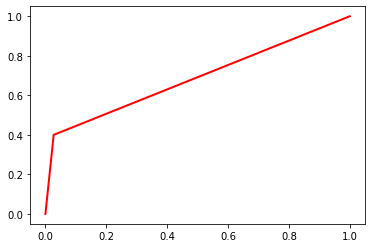

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr6, tpr6, color='red', lw=2, label='RFE Decision Tree ROC Curve (area = %0.2f)' % AUC6)
plt.plot(fpr8, tpr8, color='blue', lw=2, label='RFE Bagging ROC Curve (area = %0.2f)' % AUC8)
plt.plot(fpr9, tpr9, color='green', lw=2, label='RFE AdaBoostROC Curve (area = %0.2f)' % AUC9)
plt.plot(fpr10, tpr10, color='purple', lw=2, label='RFE XGBoost ROC Curve (area = %0.2f)' % AUC10)
plt.plot(fpr7, tpr7, color='orange', lw=2, label='RFE Random Forest ROC Curve (area = %0.2f)' % AUC7)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [20]:
# Comparing the average feature value of bankrupt & non-bankrupt companies to find trends 
pd.options.display.max_columns = None
selects = RFE_bankr_df.groupby('Bankrupt').mean()
selects

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Interest-bearing debt interest rate,Net Value Per Share (B),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Per Share Net profit before tax (Yuan ¥),Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Accounts Receivable Turnover,Average Collection Days,Fixed Assets Turnover Frequency,Revenue per person,Allocation rate per person,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Working Capital,Current Liabilities/Liability,Working Capital/Equity,Total income/Total expense,Current Asset Turnover Rate,Working capitcal Turnover Rate,Equity to Long-term Liability,Cash Flow to Liability,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.508069,0.562015,0.303657,0.781401,1.998943e+09,1.690392e+07,0.191669,0.191680,0.230146,0.323731,0.185581,2.045765e+05,0.264277,0.379871,7.257160e+06,0.630997,4.037733e+06,0.110714,0.889286,0.374129,0.183883,1.303122e+07,1.013305e+07,9.756574e+08,1.335051e+06,1.110368e+07,0.126640,3.712684e+06,2.989953e+07,0.277399,0.762384,0.736130,0.002565,1.189712e+09,0.594011,0.115149,0.462085,0.030542,0.810083,1.621670e+07,0.623927,0.608256,0.840882,0.027511,0.565371,0.048337
1,0.418503,0.456947,0.302609,0.780799,1.887486e+09,2.772727e+06,0.160416,0.160459,0.188818,0.316006,0.147765,4.240909e+07,0.263358,0.373846,4.195455e+07,0.630826,1.577273e+07,0.187047,0.812953,0.390400,0.147672,5.545455e+06,6.227273e+05,1.996603e+09,3.204545e+07,1.581818e+07,0.047736,5.020996e-03,2.549409e+08,0.277286,0.738046,0.726401,0.002076,1.380154e+09,0.593864,0.130512,0.454778,0.060443,0.738083,9.100000e+07,0.623541,0.598669,0.826008,0.028443,0.564959,0.024832


In [21]:
import matplotlib.pyplot as plt

plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

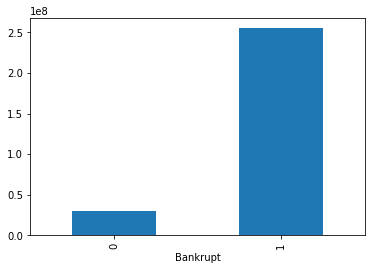

In [22]:
selects[' Cash/Current Liability'].plot.bar()

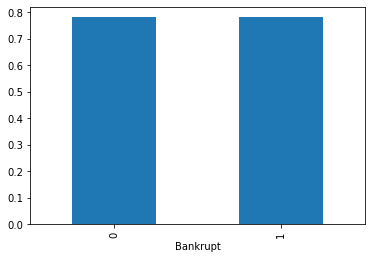

In [23]:
selects[' Continuous interest rate (after tax)'].plot.bar()

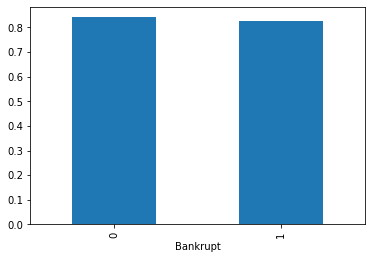

In [24]:
selects[" Net Income to Stockholder's Equity"].plot.bar()

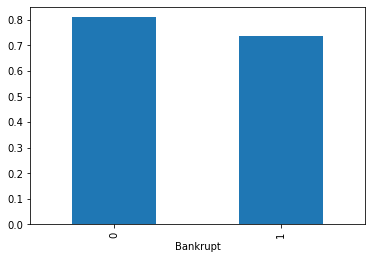

In [25]:
selects[' Net Income to Total Assets'].plot.bar()

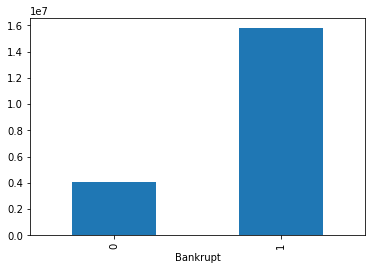

In [26]:
selects[' Total debt/Total net worth'].plot.bar()

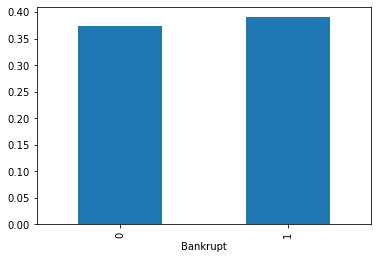

In [27]:
selects[' Borrowing dependency'].plot.bar()

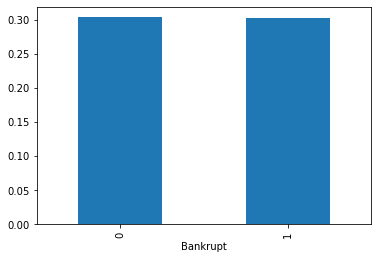

In [28]:
selects[' Non-industry income and expenditure/revenue'].plot.bar()

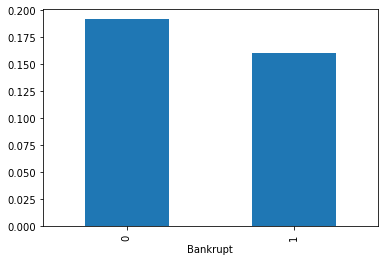

In [29]:
selects[' Net Value Per Share (C)'].plot.bar()

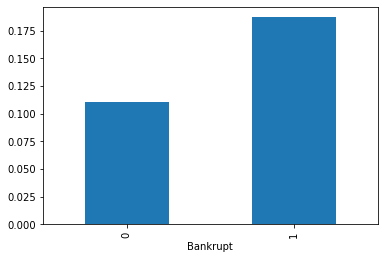

In [30]:
selects[' Debt ratio %'].plot.bar()

In [31]:
selects[' Long-term Liability to Current Assets'].plot.bar()

KeyError: ' Long-term Liability to Current Assets'

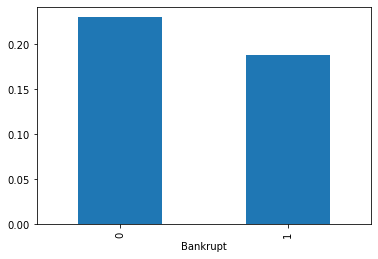

In [140]:
selects[' Persistent EPS in the Last Four Seasons'].plot.bar()

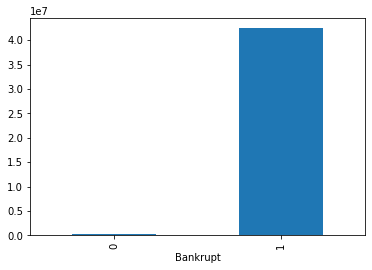

In [141]:
selects[' Net Value Growth Rate'].plot.bar()

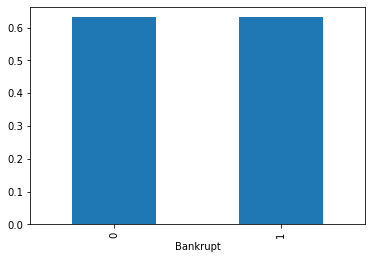

In [142]:
selects[' Interest Expense Ratio'].plot.bar()

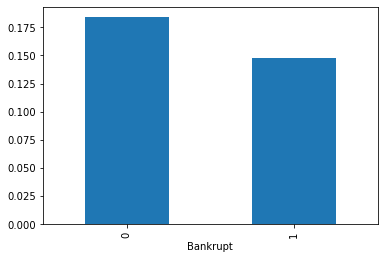

In [143]:
selects[' Net profit before tax/Paid-in capital'].plot.bar()

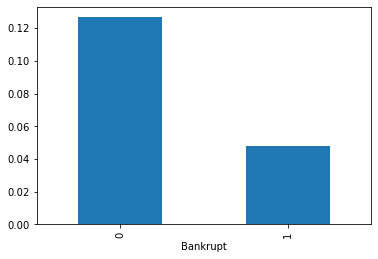

In [148]:
selects[' Cash/Total Assets'].plot.bar()